# Day1

作業1 :

請上 Kaggle, 在 Competitions 或 Dataset 中找一組競賽或資料並寫下：
https://www.kaggle.com/c/two-sigma-financial-news/overview

1. 你選的這組資料為何重要
希望使用新聞的內容來分析股票的價格，使使用者可以利用這組資料做出更好的投資決定。
幫助預測財務結果並在全世界產生重大的經濟影響。

2. 資料從何而來 (tips: 譬如提供者是誰、以什麼方式蒐集)
Market data provided by Intrinio.
News data provided by Thomson Reuters.

3. 蒐集而來的資料型態為何

    time(datetime64[ns, UTC]) - the current time (in marketdata, all rows are taken at 22:00 UTC)
    
    assetCode(object) - a unique id of an asset
    
    assetName(category) - the name that corresponds to a group of assetCodes. These may be "Unknown" if the corresponding assetCode does not have any rows in the news data.
    
    universe(float64) - a boolean indicating whether or not the instrument on that day will be included in scoring. This value is not provided outside of the training data time period. The trading universe on a given date is the set of instruments that are avilable for trading (the scoring function will not consider instruments that are not in the trading universe). The trading universe changes daily.
    
    volume(float64) - trading volume in shares for the day
    
    close(float64) - the close price for the day (not adjusted for splits or dividends)
    
    open(float64) - the open price for the day (not adjusted for splits or dividends)
    
    returnsClosePrevRaw1(float64) - see returns explanation above
    
    returnsOpenPrevRaw1(float64) - see returns explanation above
    
    returnsClosePrevMktres1(float64) - see returns explanation above
    
    returnsOpenPrevMktres1(float64) - see returns explanation above
    
    returnsClosePrevRaw10(float64) - see returns explanation above
    
    returnsOpenPrevRaw10(float64) - see returns explanation above
    
    returnsClosePrevMktres10(float64) - see returns explanation above
    
    returnsOpenPrevMktres10(float64) - see returns explanation above
    
    returnsOpenNextMktres10(float64) - 10 day, market-residualized return. This is the target variable used in competition scoring. The market data has been filtered such that returnsOpenNextMktres10 is always not null.

4. 這組資料想解決的問題如何評估
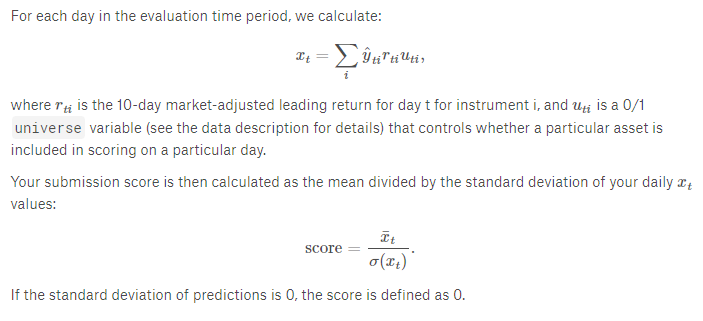



作業2：

想像你經營一個自由載客車隊，你希望能透過數據分析以提升業績，請你思考並描述你如何規劃整體的分析/解決方案：
1. 核心問題為何 (tips：如何定義 「提升業績 & 你的假設」)
    在固定的工時下，若載客空檔越短越少，可以最大化利潤
    因此要利用數據分析能夠使司機空檔減少
    or 
    供少於求時漲價，供多於求時降價
    利用數據分析找出哪些時段的哪些區域需求人數，並找出利潤公式以調整里程價格
    
2. 資料從何而來 (tips：哪些資料可能會對你想問的問題產生影響 & 資料如何蒐集)

    由車上系統紀錄，或由司機手動紀錄

3. 蒐集而來的資料型態為何

    結構化資料，其中應當包含:上車時間、上車地點、下車時間、下車地點、消費金額、里程數、搭乘人數、顧客評分

4. 你要回答的問題，其如何評估 (tips：你的假設如何驗證)

    取決於不同的公式，若計價公式是 低消 + 每里程價 * 里程數 * 【浮動比例】
    則可以利用歷史的數據去調整今日不同時段的浮動比例。
    可以先分割資料(training跟validation)，利用training資料找出各個時段的浮動比例(N個model)後，在將其apply到validation data上，並選出最好的model


## 練習時間
#### 請寫一個函式用來計算 Mean Square Error
$ MSE = \frac{1}{n}\sum_{i=1}^{n}{(Y_i - \hat{Y}_i)^2} $

### Hint: [如何取平方](https://googoodesign.gitbooks.io/-ezpython/unit-1.html)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def mean_squared_error(y, yp):
    """
    計算 MAE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mae: MAE
    """
    mse = sum((y - yp) ** 2) / len(y)
    return mse


In [6]:
def mean_absolute_error(y, yp):
    """
    計算 MAE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mae: MAE
    """
    mae = MAE = sum(abs(y - yp)) / len(y)
    return mae

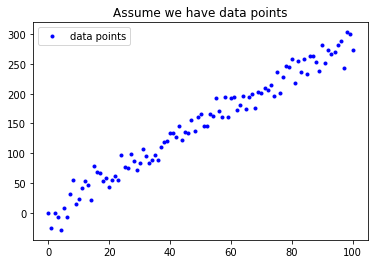

In [3]:
w = 3
b = 0.5

x_lin = np.linspace(0, 100, 101)

y = (x_lin + np.random.randn(101) * 5) * w + b

plt.plot(x_lin, y, 'b.', label = 'data points')
plt.title("Assume we have data points")
plt.legend(loc = 2)
plt.show()

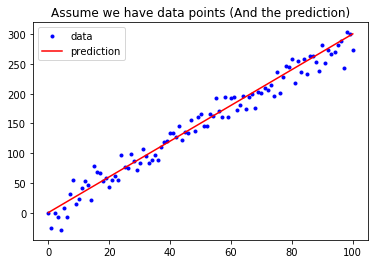

In [4]:
y_hat = x_lin * w + b
plt.plot(x_lin, y, 'b.', label = 'data')
plt.plot(x_lin, y_hat, 'r-', label = 'prediction')
plt.title("Assume we have data points (And the prediction)")
plt.legend(loc = 2)
plt.show()

In [9]:
# 執行 Function, 確認有沒有正常執行
MSE = mean_squared_error(y, y_hat)
MAE = mean_absolute_error(y, y_hat)
print("The Mean squared error is %.3f" % (MSE))
print("The Mean absolute error is %.3f" % (MAE))

The Mean squared error is 239.650
The Mean absolute error is 12.304
